# Assignment 1
### Maor Gaon ID: 301308821 28 of April 2017

In [1]:
%%javascript
Jupyter.notebook.config.update({"load_extensions":{"calico-spell-check":true,
                                                  "calico-document-tools":true,
                                                  "calico-cell-tools":true}})

<IPython.core.display.Javascript object>

$ \def\R{\mathbb{R}} $
$ \newcommand{\norm}[1]{\left\lVert#1\right\rVert} $

## Exercise 1

#### Showing the linearity of convolution:
Let $ h $, $ I_1 $ and $ I_2 $ be 2D arrays, $ c_1, c_2 \in \R $, we will show that $ (c_1 I_1 + c_2 I_2) * h = c_1 I_1 * h + c_2 I_2 * h $:

By the definition of convolution: [for any point x on the image $ (c_1 I_1 + c_2 I_2) * h $]

$ ((c_1 I_1 + c_2 I_2)h)(x) = \sum_\limits{x_i} (c_1 I_1 + c_2 I_2)(x-x_i)h(x_i) $

($ x_i $ is a point in the image h)

From the linearity of matrix multiplication by scalar and matrix summation we can write:

$ \sum_\limits{x_i} (c_1 I_1 + c_2 I_2)(x-x_i)h(x_i) = \sum_\limits{x_i} c_1 I_1 (x-x_i) h(x_i) + \sum_\limits{x_i} c_2 I_2(x-x_i)h(x_i) $

And since the scalars are independent from the image points, we can take those constants out:

$ c_1 \sum_\limits{x_i} I_1 (x-x_i) h(x_i) + c_2 \sum_\limits{x_i} I_2(x-x_i) h(x_i) $

And this expression by definition of convolution is:

$ c_1 I_1 * h + c_2 I_2 * h $ 

<div style="text-align: right"> $\blacksquare$ </div>

## Exercise 2

Let $ I \in \R^{M \times N} $ and let $ h \in \R^{m \times n} $ writing $ g = I * h $ as $ y = H * x $ where $ x $ and $ y $ are vectors of size $ (M N) $  corresponding to $ I $ and $ g $ respectively. $ H $ is a matrix of size $ (M N) \times (M N) $ corresponding to $ h $ assuming the one based zero boundary and $ h \in \R^{3 \times 3} $. 

Let us write the expression for $ H $ entries:

$ H $ should transform $ x $ into $ y $ such that for each row i from 1 to M
the values of $ y((i-1)N:iN) $ is the row $ i $ of $ g $:

By the definition of convolution:
$ g(i,j) = \sum\limits_{k,l} I(i-k,j-l) h(k,l) $

For the given h:

$ g(i,j) = I(i-1,j-1) h(1,1) + I(i-1,j) h(1,0) + I(i-1,j+l) h(1,-1) + I(i,j-l) h(0,1) + I(i,j) h(0,0) + I(i,j+1) h(0,-1) + I(i+1,j-l) h(-1,1) + I(i+1,j) h(-1,0) + I(i+1,j+1) h(-1,-1) $

Let t be an index from 1 to $ (M N) $, based on the definitions of y and x - we would get:

$ y(t) = x(t-M-1) h(1,1) + x(t-M) h(1,0) + x(t-M+1) h(1,-1) + x(t-1) h(0,1) + x(t) h(0,0) + x(t+1) h(0,-1) + x(t+M-1) h(-1,1) + x(t+M) h(-1,0) + x(t+M+1) h(-1,-1) $

Note that any output column t involve no more than 9 elements from the image (out of range elements in the sums are equal to zero). Hence for each column t we multiply the input vector x with the corresponding row j of H, where only 9 elements are non zero, thus the matrix H is sparse as expected.

The matrix H has in row t the element h(1,1) in column t-M-1 (if in range, otherwise this value would be missing in row t, same for the following out of range elements), h(1,0) in column t-M and so on following the above formula, the rest of the row elements are zero.

This completes the description of H
<div style="text-align: right"> $\blacksquare$ </div>

In [3]:
%matplotlib inline
import sys
from __future__ import print_function
from __future__ import division
sys.path.append("../../utils")
import scipy.io as sio
import utils
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.sparse import diags
from scipy.ndimage import convolve
import os
from skimage import io
from scipy.ndimage import gaussian_filter
from scipy.ndimage import uniform_filter
from scipy.ndimage.filters import median_filter
import scipy.io as sio
from scipy.linalg import svd
from cv2 import bilateralFilter
from cv2 import getDerivKernels
from scipy.sparse import csr_matrix, csc_matrix, lil_matrix
import scipy.sparse.linalg
from scipy.ndimage import zoom

# Computer Exercise 1

h1:
 [[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]
h2:
 [[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
h3:
 [[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]


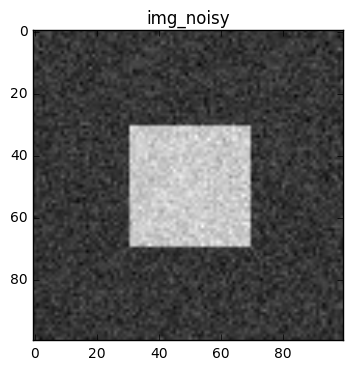

In [4]:
plt.set_cmap('gray')

M = 12
N = 16
# Implement H for the following filters:
h1 = (1 / 9.0) * np.ones((3,3), dtype=np.float)
h2 = (1 / 8.0) * np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]], dtype=float)
h3 = np.array(h2.T)
print("h1:\n", h1)
print("h2:\n", h2)
print("h3:\n", h3)
mdict = sio.loadmat(os.path.join('hw1_data', 'bilateral.mat'))
img_noisy = mdict["img_noisy"]
plt.title('img_noisy')
plt.imshow(img_noisy);

max: 0.226177319005 avg: 0.0372861155408 med: 0.0308222588307
threshold validation:  True
max: 0.248824493145 avg: 0.0494253123015 med: 0.0415752832778
threshold validation:  True
max: 0.241710977629 avg: 0.0491076289787 med: 0.0424768442754
threshold validation:  True


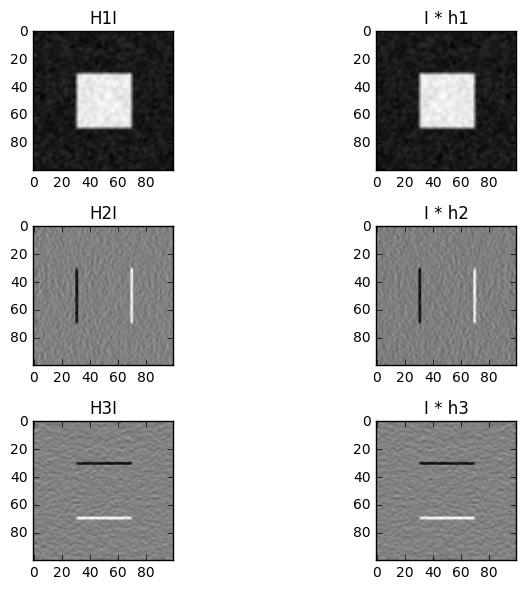

In [5]:
def get_pattern(m, k):
    r = (k - 1) // 2
    pattern = np.arange(-r, r + 1)
    pattern = np.repeat([pattern], 3, axis=0)
    pattern[0] += m
    pattern[2] -= m
    return pattern

def filter_mat(h, n, m):
    return diags(h.ravel(), get_pattern(m, h.shape[0]).ravel(), shape=(n * m, n * m))

# Filter tests:
h_list = [h1, h2, h3]
f_title = ["uniform blur", "horizontal Sobel filter", "vertical Sobel filter"]
plt.figure(len(h_list) * 2, figsize=(8, 6))
for idx, hh in enumerate(h_list):
    I = cv2.copyMakeBorder(img_noisy, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    n, m = I.shape
    x = I.ravel()
    H = filter_mat(hh, n, m)
    y = H.dot(x)
    C = y.reshape(I.shape)[1:-1,:1:-1]
    C2 = convolve(img_noisy, hh)
    plt.subplot(len(h_list), 2, 2 * (idx + 1) - 1)
    plt.title('H{}I'.format(idx + 1))
    plt.imshow(C)
    plt.subplot(len(h_list), 2, 2 * (idx + 1))
    plt.title('I * h{}'.format(idx + 1))
    plt.imshow((C2))
    DD = C2 - C
    print("max: {} avg: {} med: {}".format(np.max(np.abs(DD)), np.average(np.abs(DD)), np.median(np.abs(DD))))
    print("threshold validation: ", np.allclose(DD, 0, atol=0.3, rtol=0.3))
plt.tight_layout()

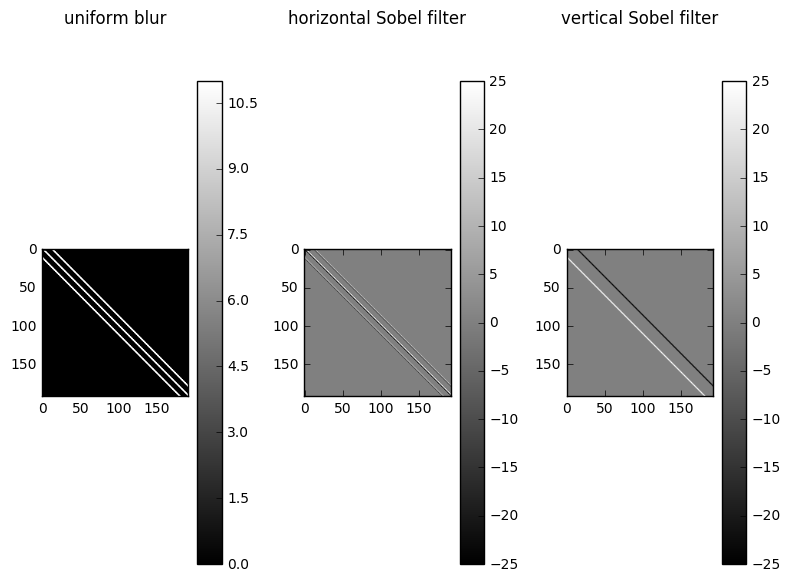

In [7]:
h_list = [h1, h2, h3]
f_title = ["uniform blur", "horizontal Sobel filter", "vertical Sobel filter"]
plt.figure(len(h_list), figsize=(8, 6))
for plt_idx, h in enumerate(h_list):
    H = filter_mat(h, N, M)
    H = np.round(H * 100).astype(np.int)
    plt.subplot(1, len(h_list), plt_idx + 1)
    plt.title(f_title[plt_idx], y=2.5)
    plt.imshow(H.todense())
    plt.colorbar()
plt.tight_layout()

## Exercise 3

The convolution can be inverted if and only if, by the construction of H matrix as described in Exercise 2 (Extending the case of filters h from size $ 3 \times 3 $ to any given filter size: similar to the code python code implementation), the result H matrix is not singular, because:

If the result matrix H is not singular: then the result of $ x = H^{-1} y $ would give us the matrix I in one dimensional vector which can be reshaped to retrieve the original matrix I.

If the result matrix H is singular: Then at least one, non zero, vector x exist for which $ y = H x $ is zero, so if we multiply this  vector by some constant (Let say 2) the result would be another non zero vector where the result y is zero, hence the equivalent two different images would give the same convolution result g. hence by given h and g alone we won't be able to reconstruct which one of them was the original input.
<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 4

This convolution filter will move the object two pixels to the left and one pixel down.

h:
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]]


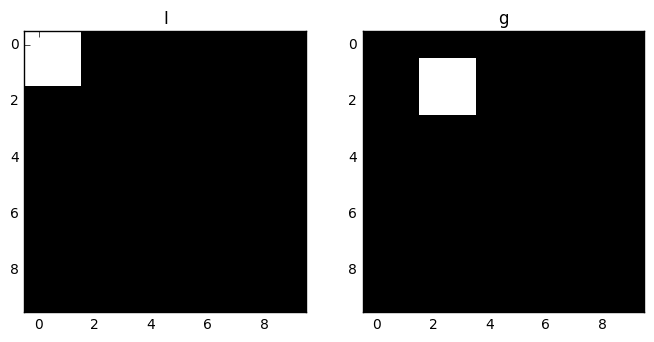

In [6]:
# Exercise 4 example:
I = np.zeros((10,10))
h = np.zeros((5,5))
h[3,4] = 1
print("h:\n", h)
I[0:2,0:2] = 1
plt.figure(2, figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title("I")
plt.imshow(I, interpolation='nearest')
g = convolve(I, h, mode='constant', cval=0.0)
plt.subplot(1, 2, 2)
plt.title("g")
plt.imshow(g, interpolation='nearest');

# Computer Exercise 2



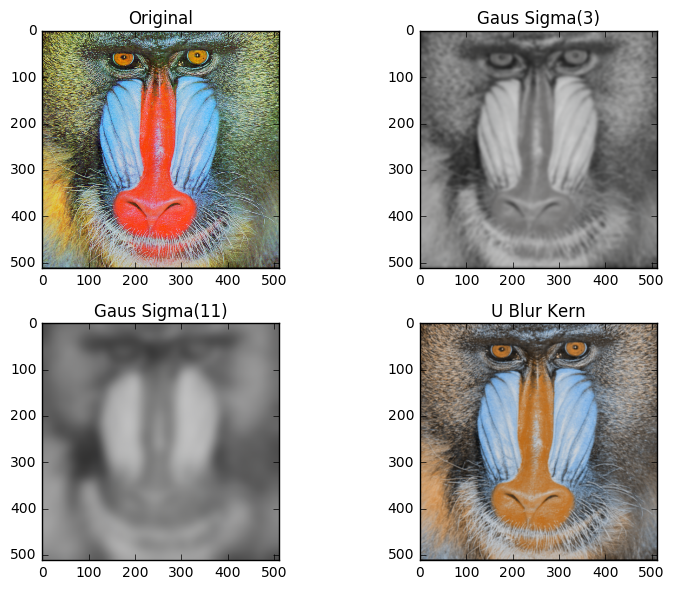

In [7]:
image = io.imread(os.path.join('hw1_data', 'mandrill.png'))
plt.figure(4, figsize=(8, 6))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(image)
# Convolving the image with filters: 
# Isotropic Gaussian with sigma = 3
plt.subplot(2,2,2)
plt.title('Gaus Sigma(3)')
plt.imshow(gaussian_filter(image, sigma=3))
# Isotropic Gaussian with sigma = 11
plt.subplot(2,2,3)
plt.title('Gaus Sigma(11)')
plt.imshow(gaussian_filter(image, sigma=11))
# Uniform 21 X 21 blur kernel
plt.subplot(2,2,4)
plt.title('U Blur Kern')
plt.imshow(uniform_filter(image))
plt.tight_layout()

# Computer Exercise 3

In [8]:
mdict = sio.loadmat(os.path.join('hw1_data', 'are_these_separable_filters.mat'))
for i in range(1, 4):
    K = mdict['K{}'.format(i)]
    print ("K{}\n{}".format(i, K))
    U,S,V = svd(K)
    print('eigens: {}'.format(S))
    sep = np.allclose(S[1:], 0) and not np.allclose(S[0], 0)
    print("seperable: {}".format(sep))
    if sep:
        s_sq = S[0] ** 0.5
        u1 = s_sq * U[:, 0]
        v1 = s_sq * V[0, :]
        if np.allclose(K, np.outer(u1, v1)):
            print("Indeed seperable")

K1
[[ 0.19339852  0.34824187  0.12570151  0.04456528  0.51652494]
 [ 0.1878551   0.33826014  0.1220985   0.0432879   0.50171968]
 [ 0.16961003  0.30540727  0.11023992  0.03908364  0.45299111]
 [ 0.01151047  0.02072627  0.00748136  0.00265239  0.03074195]
 [ 0.10543515  0.18985116  0.06852874  0.02429567  0.2815941 ]]
eigens: [  1.15572864e+00   6.79087398e-17   1.12063154e-17   4.05999507e-18
   6.55124361e-19]
seperable: True
Indeed seperable
K2
[[ 0.94568319  0.06004468  0.8640421   0.87729053  0.05119367]
 [ 0.65241862  0.55175137  0.59751325  0.48352862  0.28298816]
 [ 0.29772572  0.56150891  0.39604744  0.78870071  0.41848439]
 [ 0.14390392  0.15090669  0.05524135  0.71803719  0.29231735]
 [ 0.19877387  0.83136392  0.56799112  0.08233975  0.54499857]]
eigens: [ 2.39244588  0.98749722  0.67563127  0.13996899  0.07304454]
seperable: False
K3
[[ 0.7189846   0.48313241  1.36804665  0.90347362  1.12825347]
 [ 0.54711901  0.36161948  0.73839816  0.75561312  0.64676845]
 [ 0.69444835  0.

Base on the above analysis only the first filter (K1), has only one non zero eigenvalues value, thus its SVD decomposition (H=USV) can be constructed by $ (\sqrt{s_1} u_1) (\sqrt{s_1} v_1) $

# Exercise 5

### Showing bilateral filtering is nonlinear:

We need to show that 
$ \def\R{\mathbb{R}} $
Let $ I_1 $ and $ I_2 $ be 2D arrays, $ c_1, c_2 \in \R $, we will show that $ (c_1 I_1 + c_2 I_2) * h \neq c_1 I_1 * h + c_2 I_2 * h $ for some bilateral filter h:

For example let h be a bilateral filter that double the intensity if the intensity as a neighbor with the same value, let $ I_1 $ and $ I_2$ be two complete to one matrices (all the values are either zero or one and the sum of those matrices is a matrix of ones) such that $ I_1 $ contains ones only in odd rows and columns. applying the filter on each of those images and then sum yields matrix of ones, while applying the filter on the sum of those two, yields a matrix of 2's, which breaks the linearity, hence bilateral filtering is nonlinear.

<div style="text-align: right"> $\blacksquare$ </div>

# Computer Execise 4

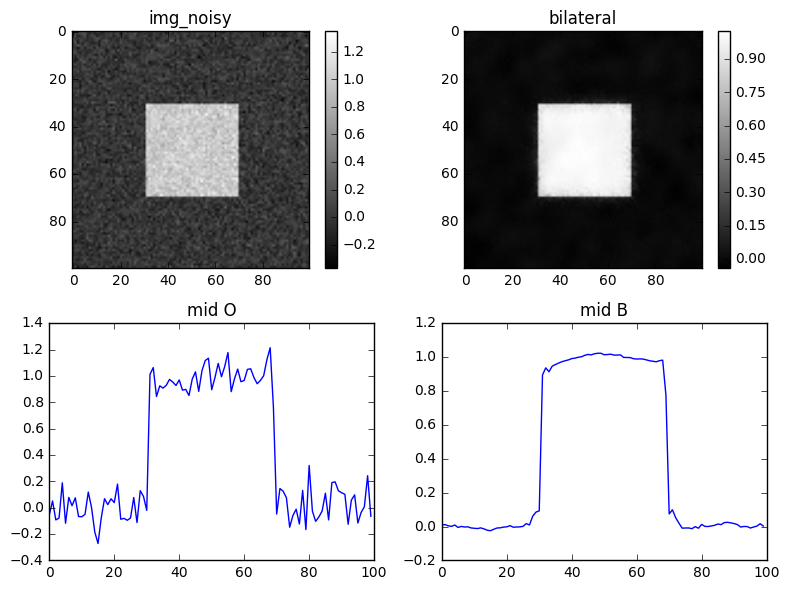

In [9]:
mdict = sio.loadmat(os.path.join('hw1_data', 'bilateral.mat'))
img_noisy = mdict["img_noisy"]
plt.figure(4, figsize=(8, 6))
plt.subplot(2,2,1)
plt.title("img_noisy")
plt.imshow(img_noisy)
plt.colorbar()
plt.subplot(2,2,2)
plt.title("bilateral")
g = bilateralFilter(img_noisy, 20, 0.5, 3)
plt.imshow(g)
plt.colorbar()
plt.subplot(2,2,3)
plt.title("mid O")
plt.plot(img_noisy[img_noisy.shape[0] // 2, :])
plt.tight_layout()
plt.subplot(2,2,4)
plt.title("mid B")
plt.plot(g[g.shape[0] // 2, :])
plt.tight_layout()

# Exercise 6

Laplacian operator defined as:
$ \nabla^2 G(x,y,\sigma) \triangleq \frac{\partial^2 G(x,y,\sigma)}{\partial x^2} + \frac{\partial^2 G(x,y,\sigma)}{\partial y^2} = (\frac{\partial^2 }{\partial x^2} + \frac{\partial^2 }{\partial y^2}) G(x,y,\sigma) $

Need to show for Gaussian $ G(x,y,\sigma) = \frac {1}{\sqrt  {2 \Pi \sigma^2 }} exp (- \frac {x^2 + y^2} {2 \sigma^2}) $ the equivalent of:

$ \nabla^2 G(x,y,\sigma) = (\frac {x^2 + y^2} {\sigma^4} - \frac {2} {\sigma^2}) G(x,y,\sigma) $

For simplicity we omit the constant value $ \frac {1}{\sqrt  {2 \Pi \sigma^2 }} $ till the end:

$ \frac{\partial exp (- \frac {x^2 + y^2} {2 \sigma^2})}{\partial x} = - \frac {x} {\sigma^2}exp (- \frac {x^2 + y^2} {2 \sigma^2}) $

$ \frac{\partial exp (- \frac {x^2 + y^2} {2 \sigma^2})}{\partial x^2} = \frac {x^2} {\sigma^4}exp (- \frac {x^2 + y^2} {2 \sigma^2}) - \frac {1} {\sigma^2}exp (- \frac {x^2 + y^2} {2 \sigma^2}) = (\frac {x^2} {\sigma^4} - \frac {1} {\sigma^2}) exp (- \frac {x^2 + y^2} {2 \sigma^2}) $

From symmetry of x and y we get:

$ \frac{\partial exp (- \frac {x^2 + y^2} {2 \sigma^2})}{\partial x^2} + \frac{\partial exp (- \frac {x^2 + y^2} {2 \sigma^2})}{\partial y^2} = (\frac {x^2 + y^2} {\sigma^4} - \frac {2} {\sigma^2}) exp (- \frac {x^2 + y^2} {2 \sigma^2}) $

After returning the constant we get the expected equation:

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 7

We need to show the equation:

$ \nabla^2 I(x,y) = \nabla^2 I(u(x,y),v(x,y))$

For: 

$ u(x,y) =  x cos \theta -  y sin \theta $

$ v(x,y) =  x sin \theta +  y cos \theta $

By the definition of the laplacian operator, we need to show:

$  \frac{\partial^2 I(x,y)}{\partial x^2} + \frac{\partial^2 I(x,y)}{\partial y^2} = \frac{\partial^2 I(u(x,y), v(x,y)}{\partial u^2} + \frac{\partial^2 I(u(x,y), v(x,y))}{\partial v^2} $

Let us abbreviate the functions:

$ \frac{\partial I}{\partial x} = \frac{\partial I}{\partial u} \frac{\partial u}{\partial x} + \frac{\partial I}{\partial v} \frac{\partial v}{\partial x} $

$ \frac{\partial I^2}{\partial x^2} = \frac{\partial }{\partial x}( \frac{\partial I}{\partial x} ) = \frac{\partial I^2}{\partial u^2} (\frac{\partial u}{\partial x})^2  + \frac{\partial I^2}{\partial v^2} (\frac{\partial v}{\partial x})^2  + \frac{\partial I^2}{\partial u} \frac{\partial u^2}{\partial x^2}+ \frac{\partial I^2}{\partial v} \frac{\partial v^2}{\partial x^2} + 2 \frac{\partial I^2}{\partial u \partial v} \frac{\partial u}{\partial x} \frac{\partial v}{\partial x}  $

Similarly:

$ \frac{\partial I^2}{\partial y^2} = \frac{\partial }{\partial y}( \frac{\partial I}{\partial y} ) = \frac{\partial I^2}{\partial u^2} (\frac{\partial u}{\partial y2})^2  + \frac{\partial I^2}{\partial v^2} (\frac{\partial v}{\partial y})^2  + \frac{\partial I^2}{\partial u} \frac{\partial u^2}{\partial y^2}+ \frac{\partial I^2}{\partial v} \frac{\partial v^2}{\partial y^2} + 2 \frac{\partial I^2}{\partial u \partial v} \frac{\partial u}{\partial y} \frac{\partial v}{\partial y}  $

Let's note that:

$ \frac{\partial u} {\partial x} =  cos \theta $

$ \frac{\partial v} {\partial x} =  sin \theta $

$ \frac{\partial u} {\partial y} =  -sin \theta $

$ \frac{\partial v} {\partial y} =  cos \theta $

And any second order derivation is 0, hence:

$ \frac{\partial I^2}{\partial x^2} = \frac{\partial I^2}{\partial u^2} (\frac{\partial u}{\partial x})^2  + \frac{\partial I^2}{\partial v^2} (\frac{\partial v}{\partial x})^2 = \frac{\partial I^2}{\partial u^2} cos^2 \theta  + \frac{\partial I^2}{\partial v^2} sin^2 \theta $

$ \frac{\partial I^2}{\partial y^2} = \frac{\partial I^2}{\partial u^2} (\frac{\partial u}{\partial y})^2  + \frac{\partial I^2}{\partial v^2} (\frac{\partial v}{\partial y})^2 = \frac{\partial I^2}{\partial u^2} sin^2 \theta + \frac{\partial I^2}{\partial v^2} cos^2 \theta $

$ \frac{\partial I^2}{\partial x^2} + \frac{\partial I^2}{\partial y^2} = \frac{\partial I^2}{\partial u^2} cos^2 \theta  + \frac{\partial I^2}{\partial u^2} sin^2 \theta + \frac{\partial I^2}{\partial v^2} cos^2 \theta + \frac{\partial I^2}{\partial v^2} sin^2 \theta = \frac{\partial I^2}{\partial u^2}(cos^2 \theta  + sin^2 \theta) + \frac{\partial I^2}{\partial v^2}(cos^2 \theta + sin^2 \theta) =  \frac{\partial I^2}{\partial u^2} + \frac{\partial I^2}{\partial v^2}$

<div style="text-align: right"> $\blacksquare$ </div>

# Computer Exercise 5

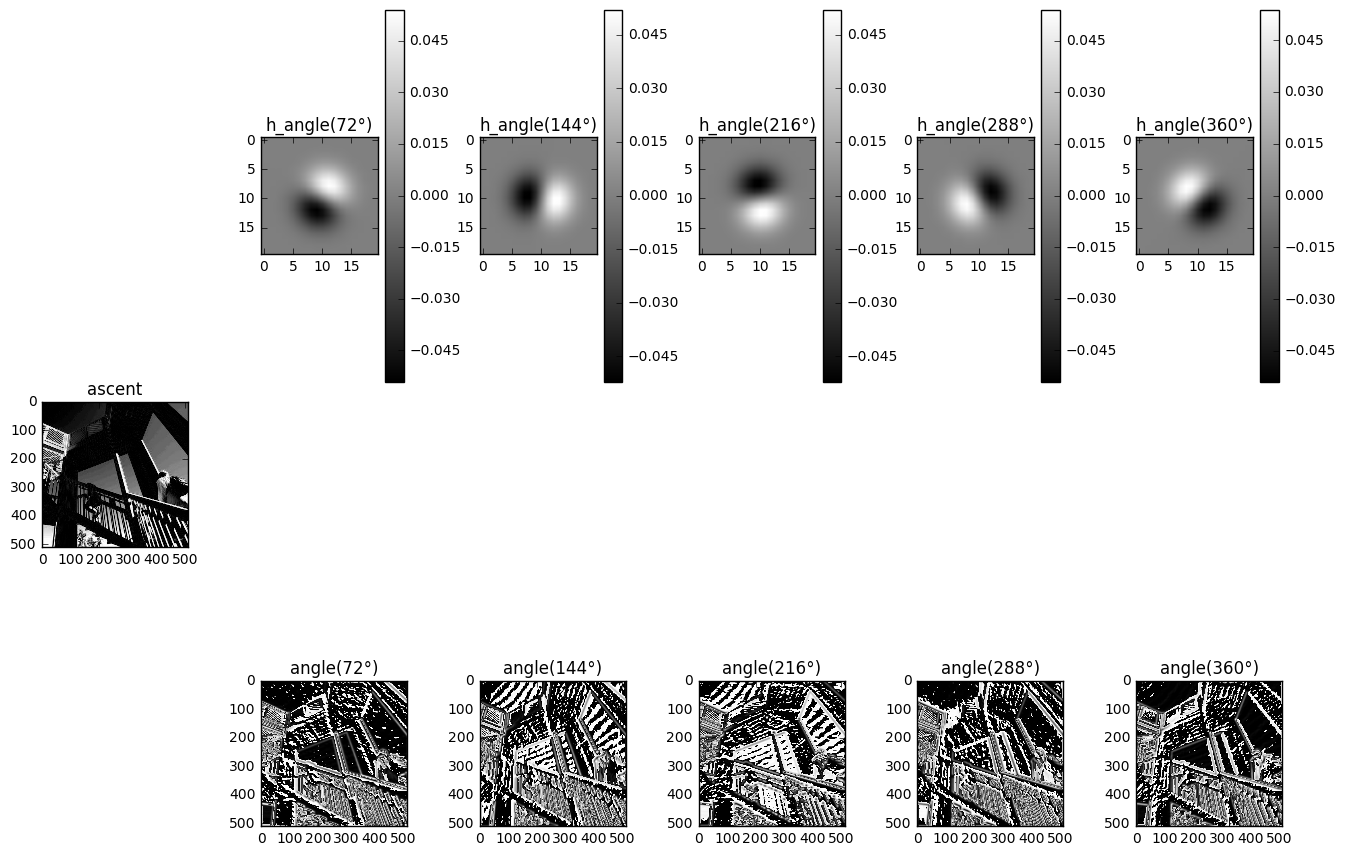

In [10]:

def gauss(M, sigma, x, y):
    r = np.power(x, 2) + np.power(y, 2)
    return (1.0 / np.sqrt(2.0 * np.pi * np.power(sigma, 2))) * np.exp((-(r/(2.0 * np.power(sigma, 2)))))

def rotate_mesh(x, y, angle):
    u = x * np.cos(angle) - y * np.sin(angle)
    v = x * np.sin(angle) + y * np.cos(angle)
    return u, v

def rotate_gauss(M, sigma, angle, x, y):
    return gauss(M, sigma, rotate_mesh(x,y, angle))

def gauss_part_x(M, sigma, angle):
    t = s = 0.5 * M
    s *= -1
    x, y = np.mgrid[s:t, s:t]
    u, v = rotate_mesh(x, y, angle)
    return (-u/np.power(sigma, 2)) * gauss(M, sigma, u, v)

def gauss_part_y(M, sigma, angle):
    t = s = 0.5 * M
    s *= -1
    x, y = np.mgrid[s:t, s:t]
    u, v = rotate_mesh(x, y, angle)
    return (-v/np.power(sigma, 2)) * gauss(M, sigma, u, v)

def dir_filt(M, sigma, angle):
    return gauss_part_x(M, sigma, angle) + gauss_part_y(M, sigma, angle)

image = io.imread(os.path.join('hw1_data', 'ascent.jpg'))
image = image[:,:,0]
plt.figure(11, figsize=(16, 12))
plt.subplot2grid((2,6), (0,0), rowspan=2)
plt.title("ascent")
plt.imshow(image)
R = 5
rad = (2.0 * np.pi) / R
for i in range(1, R + 1):
    h = dir_filt(20, 2.5, rad * i)
    c = convolve(image, h, mode='constant', cval=0.0)
    plt.subplot2grid((2, 6), (0, i))
    plt.title(u"h_angle({}\N{DEGREE SIGN})".format(i*72))
    plt.imshow(h)
    plt.colorbar()
    plt.subplot2grid((2, 6), (1, i))
    plt.title(u"angle({}\N{DEGREE SIGN})".format(i*72))
    plt.imshow(c)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Exercise 8

Since mapping is also equivalent to matrix multiplication $ A x $, and A is a square matrix, hence based on linear algebra, the equation is invertible if and only if the matrix A is invertible (the determinant of A is not zero).

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 9

Let $ f(x) = a x + b $ be such a line (with b != 0), we will show that this operation is nonlinear, thus:

Let $x_1 = -1$, $x_2 = 1$ be two points.

$ f(x_1 + x_2) = f(0) = b $

and on the other hand:

$ f(x_1) + (x_2) = f(-1) + f(1) = -a + b +a + b = 2b \neq f(x_1 + x_2) $

hence this operation is nonlinear.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 10

let's mark $ y = f(x) = Ax + b $, given A, b and y, we want to reconstruct x. So we get:

$ Ax = y - b $. If and only if A is invertible we could multiply both sides with $ A^{-1} $ and get $ x = A^{-1} (y - b) $ 

So same as the linear case, there is a solution if and only if A is invertible.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 11

Let $ h = g \circ f$ so:

$ h(x) = g(f(x)) = g(A_1 x + b_1) = A_2 (A_1 x + b_1) + b_2 = A_2 A_1 x + A_2 b_1 + b_2 $

$ A_2 A_1 $ is a matrix of size $ (k \times n) $ let's mark it as $ A = A_2 A_1 $ and $ A_2 b_1 + b_2 $ is a constant vector of size $ (k) $, let's mark this constant vector as $ b = A_2 b_1 + b_2 $

We end up with affine mapping $ h: x \rightarrow Ax + b $ $ A \in R^{k \times n} $ $ b \in R^m $

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 12

Using the same construction as the previews exercise we get:

$ h: x \rightarrow Ax + b $ $ A \in R^{n \times n} $ $ b \in R^n $

where:

$ A = A_2 A_1 $

$ b = A_2 b_1 + b_2 $

Let mark: $ A^{-1} = A_1^{-1} A_2^{-1} $, and show that this is the inverse matrix of A, thus $ A A^{-1} = I $, indeed:

$ A A^{-1} = A_2 A_1 A_1^{-1} A_2^{-1} = A_2 I A_2^{-1} = A_2 A_2^{-1} = I $, based on the definition of the inverse of $ A_1 $ and $ A_2 $, and the proof is complete.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 13

Let's define $ y = f(x) = A x + b $, let's mark $ f^{-1}(x) = A^{-1} y - A^{-1} b $, $ A^{-1} $ is defined since f is invertible, and $ f^{-1} $ is also affine map.

<div style="text-align: right"> $\blacksquare$ </div>

In [11]:
mdict = sio.loadmat(os.path.join('hw1_data', 'imgs_for_optical_flow.mat'))
u = mdict['u']
v = mdict['v']
img1 = mdict['img1']
img2 = mdict['img2']
img3 = mdict['img3']
img4 = mdict['img4']
img5 = mdict['img5']
img6 = mdict['img6']

# Computer Exercise 9

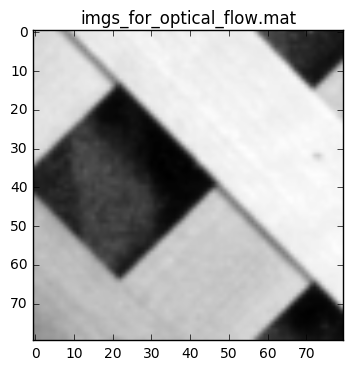

In [12]:
plt.title('imgs_for_optical_flow.mat')
plt.imshow(img1);

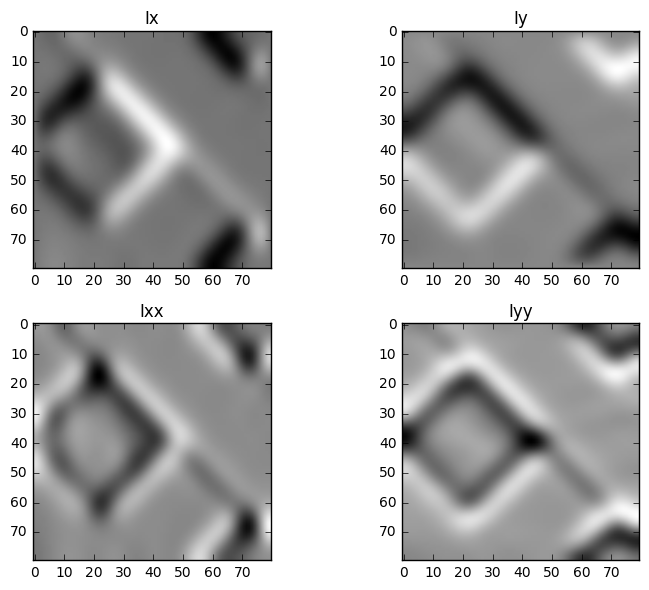

In [13]:
I = gaussian_filter(img1, sigma=3)
K = 25
kx, ky = getDerivKernels(1, 0, K, normalize = True)
hx = -np.outer(ky, kx)
kx, ky = getDerivKernels(0, 1, K, normalize = True)
hy = -np.outer(ky, kx)
kx, ky = getDerivKernels(2, 0, K, normalize = True)
hxx = -np.outer(ky, kx)
kx, ky = getDerivKernels(0, 2, K, normalize = True)
hyy = -np.outer(ky, kx)
plt.figure(4, figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.title('Ix')
Ix = convolve(I, hx)
plt.imshow(Ix)
Iy = convolve(I, hy)
plt.subplot(2, 2, 2)
plt.title('Iy')
plt.imshow(Iy)
Ixx = convolve(I, hxx)
plt.subplot(2, 2, 3)
plt.title('Ixx')
plt.imshow(Ixx)
Iyy = convolve(I, hyy)
plt.subplot(2, 2, 4)
plt.title('Iyy')
plt.imshow(Iyy)
plt.tight_layout()

# Exercise 14

### Batching in the gray scale equation:
$ \begin{bmatrix} R_x(x, t) \\ G_x(x, t) \\ B_x(x, t) \end{bmatrix} u(x) + \begin{bmatrix} R_y(x, t) \\ G_y(x, t) \\ B_y(x, t) \end{bmatrix} v(x) + \begin{bmatrix} R_t(x, t) \\ G_t(x, t) \\ B_t(x, t) \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix} $ 

### Which equals to: 

$ \begin{bmatrix} R_x(x, t) \\ G_x(x, t) \\ B_x(x, t) \end{bmatrix} u(x) + \begin{bmatrix} R_y(x, t) \\ G_y(x, t) \\ B_y(x, t) \end{bmatrix} v(x) = \begin{bmatrix} -R_t(x, t) \\ -G_t(x, t) \\ -B_t(x, t) \end{bmatrix} $ 

### And equals to:

$ \begin{bmatrix} R_x(x, t) & R_y(x, t) \\ G_x(x, t) & G_y(x, t) \\ B_x(x, t) & B_y(x, t) \end{bmatrix} \begin{bmatrix} u(x) \\ u(y) \end{bmatrix} = \begin{bmatrix} -R_t(x, t) \\ -G_t(x, t) \\ -B_t(x, t) \end{bmatrix} $

Let's mark the above matrix as A and $ U = \begin{bmatrix} u(x) & v(x) \end{bmatrix}^T $ will be the input vector for this matrix.

The solution for this equation cases:

1. Infinitely many solutions: If by solving this linear equation we end up with rank 1 (and after ranking the equations we end up with two rows of 0 0 0, means two of the equations have no effect), there are infinite many solutions.

2. Unique solution: If by solving this linear equation we end up with rank 2 ((and after ranking the equations we end up with the last equation row as 0 0 0, means it redundant, hence we have to equations and two constraints), there is a single unique solution.

3. No solution: If the ranking process yields with at least one of the equation lines as 0 0 x, where x != 0, hence this equation is contradict, thus there is no solution for those equations.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 15

$ \epsilon^2(u(x),v(x)) = \norm { \begin{bmatrix} R_x(x, t) \\ G_x(x, t) \\ B_x(x, t) \end{bmatrix} u(x) + \begin{bmatrix} R_y(x, t) \\ G_y(x, t) \\ B_y(x, t) \end{bmatrix} v(x) + \begin{bmatrix} R_t(x, t) \\ G_t(x, t) \\ B_t(x, t) \end{bmatrix} } ^2 $

Yes: A linear combination of convex functions is also convex.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 16

Let $ I(x, y, z, t) $ be the image input. 

Similar to the development of gradient-constraint equation for gray-scale 2D image, using the chain rule we get:

$\frac{\partial I}{dt}= \frac{ \partial I }{ \partial x } \frac{ \partial x }{ \partial t } + \frac{ \partial I }{ \partial y } \frac{ \partial y }{ \partial t } + \frac{ \partial I}{\partial z} \frac{dz}{dt} + \frac{ \partial I }{ \partial t } \frac{ \partial t }{ \partial t } $

Which simplify to:

$ \frac{ \partial I }{ \partial x } \frac{ \partial x }{ \partial t } + \frac{ \partial I }{ \partial y } \frac{ \partial y }{ \partial t } + \frac{ \partial I }{ \partial z } \frac{ \partial z }{ \partial t } + \frac{ \partial I }{ \partial t } \cdot 1$ 

Returning the parameters and using the partial notation to get similar equation to the 2D case and demanding the equality to zero:

Note: here x is the vector (x,y,z).

$I_x(x,t) u(x) + I_y(x,t) v(x) + I_z(x,t) w(x) + I_t(x,t) = 0 $

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 17

### Part 1:

Let: $ X \sim \mathcal{N}(\mu, \sigma^2) $, $ Y = aX + b $, $ a > 0 $, $ b \in \R $

We need to show that: $ P_Y(y) = \left | \frac{ 1 }{ a } \right | P_X \left ( \frac{ y - b }{ a } \right ) $ consistent with the fact that $ Y \sim \mathcal{N}(a \mu + b, a^2 \sigma^2) $:

The normal distribution function we get:

$ P_X(x) = \frac{ 1 }{ \sqrt{ 2 \pi \sigma^2 } } \cdot \exp \left (-\frac{ (x - \mu)^2 }{ 2 \sigma^2 } \right ) $

Now let's modify the equation to match $ P_Y(y) $:

$ P_Y(y) = \left | \frac{ 1 }{ a } \right | P_X(\frac{ y - b }{ a }) = \left | \frac{ 1 }{ a } \right | \frac{ 1 }{ \sqrt{ 2 \pi \sigma^2 } } \cdot \exp \left (-\frac{ \left ( \left ( \frac{ y - b }{ a } \right ) - \mu \right )^2 }{ 2 \sigma^2 } \right ) = \frac{ 1 }{ \sqrt{ 2 \pi a^2 \sigma^2 } } \cdot \exp \left (-\frac{ \left (  y -( a \mu + b ) \right )^2 }{ 2 a^2 \sigma^2 } \right ) $

And by the definition of the normal distribution equation we have proved the consistency.

### Part 2:

Let $ \epsilon \sim \mathcal{N}(0, \sigma^2) $ and $ \mu $ some constant

Let Y be a random variable such that: $ y = \mu + \epsilon $

Using part one where $ x = \epsilon $, $ b = \mu $ and $ a = 1 $ we would get:

$ Y = \mu + \epsilon \sim  \mathcal{N}(\mu, \sigma^2) $

and:

$ P_Y(y) = P_X ( y - \mu ) = \frac{ 1 }{ \sqrt{ 2 \pi \sigma^2 } } \cdot \exp \left (-\frac{ (y - \mu)^2 }{ 2 \sigma^2 } \right ) $

### Part 3:

Based on the normal distribution function we get that:

$ \epsilon \sim \mathcal{ N }( 0, \sigma^2 ) $, $ \mu $ is some constance, hence like the previews part, we get that:

$ -I_t(x, t) = \mu + \epsilon \sim \mathcal{ N }( \mu, \sigma^2 ) $

<div style="text-align: right"> $\blacksquare$ </div>

# Computer Exercise 10

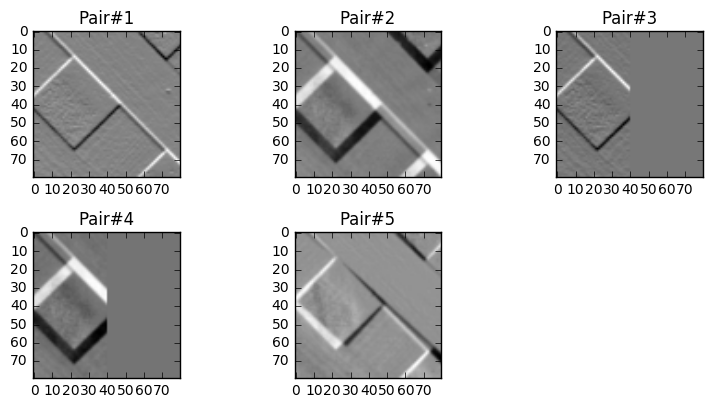

In [14]:
I1 = img1
plt.figure(5, figsize=(8, 6))
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(I - I1)
plt.tight_layout()

By the result we get that there was a movement:

In pairs 1,2,5: On the whole image, compared to the first image.

In pairs 3,4: On the left part only, compared to the first image.

# Exercise 18

The easiest and most elegant solution for the corner cases would be to create a mirror frame around the image (each frame pixel take the closest in image value, another way to see this, if one sell refer to out of image cell, the return value would be the referring pixel value)

After creating this frame, physically or dynamically upon referring, the cost function would calculate the values inside the frame, so all the corner cases receives no special treatment. 

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 19

### Part 1

The $ u(\cdot) $, $ v(\cdot) $ that minimize $ E_data $ are the movement that best preserve the brightness constraint, hence the movement are small enough and assuming that two following image intervals t's follows the brightness constraint, thus the approximate indeed gives us the movements $ u(\cdot) $, $ v(\cdot) $, has expected.

### Part 2

The $ u(\cdot) $, $ v(\cdot) $ that minimize $ E_smoothness $ are the movement that best preserve the in neighbourhood consistency, hence the movement that best preserve smoothness.

This is a regularization factor, means it tradeoff overfitting with more general result based on the regularization factor $ \lambda $

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 20

The solution for exercise 18, solves also this scenario, while avoiding code complications over corner cases.

<div style="text-align: right"> $\blacksquare$ </div>

# Exercise 21

Like exercise 18 and 20, we will use the mirroring method again, this time we shell see how it is done:

Let $ A \xi = b $ be the original equation like describe above this question:

Note that $ \xi $ contains the unknown variables to be found

$ A $ contains zeros, constants and values based on the image spacial derivations, and $ b $ is a vector based on combination between the spatial and time derivations of the image.

To perform the mirroring we shall mirror each border pixel from the closest pixel in the original image as described in exercise 18 on matrix A. 
The result matrix $ \hat A $ has size of $ (2(N+1) \times 2(N+1)) $, the vectors $ \xi $ and b should add two more locations at the head and tail of the vector - those values can be arbitrary and discarded (preferably zeros).

When solving the system the result $ \xi $ vector contains the result on the cells neglecting those two added cells.

<div style="text-align: right"> $\blacksquare$ </div>

# Computer Exercise 11

In [19]:
def computeDerivatives(I1, I2, K=25):
    hx = np.outer(*getDerivKernels(1, 0, K, normalize=True)[::-1])
    hy = np.outer(*getDerivKernels(0, 1, K, normalize=True)[::-1])
    Ix = -(convolve(I1, hx) + convolve(I2, hx))
    Iy = -(convolve(I1, hy) + convolve(I2, hy))
    It = I2 - I1
    return Ix, Iy, It


def hs_filter(reg, d_part, n, m):
    h = reg * np.array([[0, -2, 0], 
                        [-2, 8, -2], 
                        [0, -2, 0]])
    return filter_mat(h, n, m) + diags(d_part, shape=(n * m, n * m))


def hs_mat(I1, I2, reg, K=25):
    n, m = I1.shape
    N = n * m
    Ix, Iy, It = computeDerivatives(I1, I2, K)
    A = csr_matrix((2 * N, 2 * N))
    A[::2, ::2] = hs_filter(reg, (Ix**2).ravel(), n, m)
    A[::2, 1::2] = diags((Ix * Iy).ravel(), shape=(N, N))
    A[1::2, 1::2] = hs_filter(reg, (Iy**2).ravel(), n, m)
    A[1::2, ::2] = diags((Ix * Iy).ravel(), shape=(N, N))
    b = csr_matrix((2 * N, 1))
    b[::2] = ((-(Ix * It)).ravel()).reshape((-1, 1))
    b[1::2] = ((-(Iy * It)).ravel()).reshape((-1, 1))
    return A, b

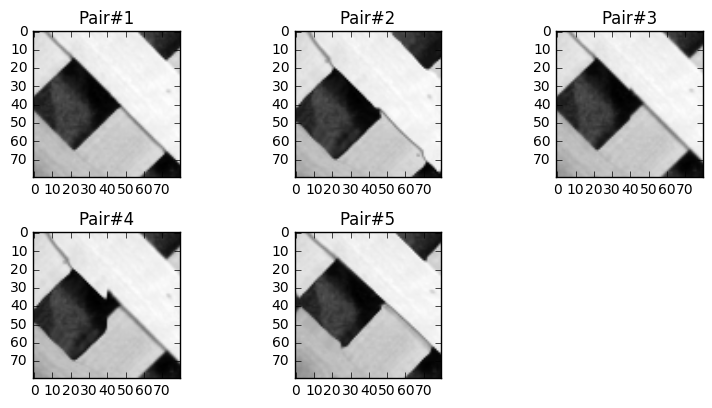

In [21]:
# The best reg found, by many experiments.
reg = 0.0025
plt.figure(5, figsize=(8, 6))
I1 = cv2.copyMakeBorder(img1, 1, 1, 1, 1, cv2.BORDER_REFLECT)
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    I2 = cv2.copyMakeBorder(I, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    A, b = hs_mat(I1, I2, reg)
    X = scipy.sparse.linalg.spsolve(A, b)
    u = X[::2].reshape(I1.shape)[1:-1, 1:-1]
    v = X[1::2].reshape(I1.shape)[1:-1, 1:-1]
    yy, xx = np.mgrid[0:img1.shape[0], 0:img1.shape[0]]
    Iorg = cv2.remap(I, (xx+u).astype(np.float32), (yy+v).astype(np.float32), 
                         interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT)
    Iwarpped = cv2.remap(img1, (xx-u).astype(np.float32), (yy-v).astype(np.float32), 
                         interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT, dst=Iorg)
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(Iwarpped)
plt.tight_layout()

# Computer Exercise 12

In [24]:
def coarse_to_fine(I1, I2, L=3, is_lk=False, lk_itr=3, lk_n=3, lk_m=3, lk_global=False):
    K_list = [25, 9, 3]
    reg = 0.0025
    img_list = []
    img_list.append((I1, I2))
    for l in xrange(L, 0, -1):
        I1 = zoom(I1, .5, order=1)
        I2 = zoom(I2, .5, order=1)
        img_list.append((I1, I2))
    Iwarpped = np.zeros_like(I1)
    U = np.zeros_like(I1, dtype=np.float)
    V = np.zeros_like(I2, dtype=np.float)
    I1, I2 = img_list.pop()
    for l in xrange(L, 0, -1):
        K = K_list.pop()
        I1 = cv2.copyMakeBorder(I1, 1, 1, 1, 1, cv2.BORDER_REFLECT)
        I2 = cv2.copyMakeBorder(I2, 1, 1, 1, 1, cv2.BORDER_REFLECT)
        if is_lk:
            if lk_global:
                du, dv = lk_alg(I1, I2, ITR=lk_itr, glob_mod=True)
            else:
                du, dv = lk_alg(I1, I2, ITR=lk_itr, sz_n=lk_n, sz_m=lk_m)
            du = du[1:-1, 1:-1]
            dv = dv[1:-1, 1:-1]
        else:            
            A, b = hs_mat(I1, I2, reg, K)
            X = scipy.sparse.linalg.spsolve(A, b)
            du = X[::2].reshape(I1.shape)[1:-1, 1:-1]
            dv = X[1::2].reshape(I1.shape)[1:-1, 1:-1]
        du = median_filter(du, 3)
        dv = median_filter(dv, 3)
        U = 2*zoom(U+du, 2., order=1)
        V = 2*zoom(V+dv, 2., order=1)
        I1, I2 = img_list.pop()
        yy, xx = np.mgrid[0:I1.shape[0], 0:I1.shape[0]]
        Iorg = cv2.remap(I2, (xx+U).astype(np.float32), (yy+V).astype(np.float32), 
                         interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT)
        I1 = cv2.remap(I1, (xx-U).astype(np.float32), (yy-V).astype(np.float32), 
                       interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT, dst=Iorg)
    return I1

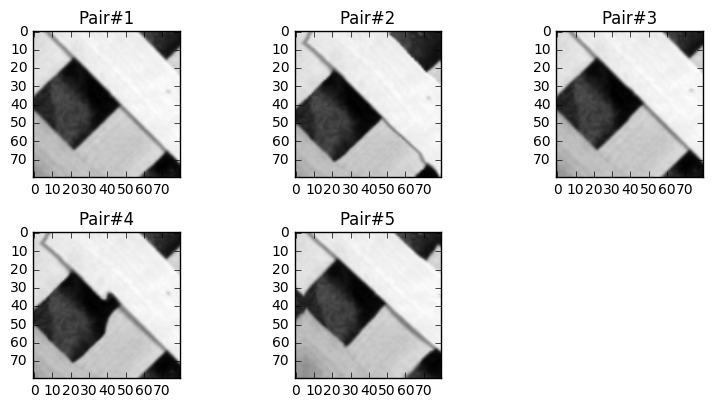

In [25]:
# The best reg found, by many experiments.
reg = 0.0025
plt.figure(5, figsize=(8, 6))
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(coarse_to_fine(img1, I))
plt.tight_layout()

# Computer Exercise 13

In [33]:
def get_neighberhood(x, y, n, m):
    if n % 2 == 0:
        n += 1
    if m % 2 == 0:
        m += 1
    dx = int((m - 1) // 2)
    dy = int((n - 1) // 2)
    yy, xx = np.mgrid[(y - dy):(y + dy + 1), (x - dx):(x + dx + 1)]
    return np.dstack([yy, xx]).reshape(-1, 2), dx, dy


def lk_A(dx, dy):
    return np.array([[dx, dx, 1, 0, 0, 0], [0, 0, 0, dx, dy, 1]])


def lk_M_mat(I1, I2, x, y, glob_mod=True, K=25, sz_n=3, sz_m=3, sigma=2):
    M = np.zeros((6, 6))
    b = np.zeros((6, 1))
    n, m = I1.shape
    if glob_mod:
        N, _, _ = get_neighberhood(x, y, I1.shape[0] - 1, I1.shape[1] - 1)
    else:
        N, _, _ = get_neighberhood(x, y, sz_n, sz_m)
    dN = N - (y, x)
    Ix, Iy, It = computeDerivatives(I1, I2, K)
    i, j = N[:, 0], N[:, 1]
    Igrad = np.stack((Ix[i, j], Iy[i, j]), axis=1)
    It = It[i, j]
    if not glob_mod:
        W = diags(np.exp(-np.sum(dN**2, axis=1) / (2 * sigma**2))).todense()
    # Go over the neighborhood around (x, y)
    for yi, xi in N:
        if xi < 0 or yi < 0 or xi >= m or yi >= n:
            continue
        A = lk_A(xi - x, yi - y)
        
        if glob_mod:
            Igrad = csr_matrix(Igrad)
            common = A.T * Igrad.T
            M += ((common * Igrad).dot(A))
            b -= common.dot(It.reshape(-1, 1))
        else:
            common = A.T.dot(Igrad.T.dot(W))
            M += common.dot(Igrad.dot(A))
            b -= common.dot(It.reshape(-1, 1))
            
    return M, b, N


def lk_A(dx, dy):
    return np.array([[dx, dx, 1, 0, 0, 0], [0, 0, 0, dx, dy, 1]])


def lk_local_vel(I1, I2, x, y, tetha, N):
    U = np.zeros_like(I1)
    V = np.zeros_like(I1)
    for yi, xi in N:
        if xi < 0 or yi < 0 or xi >= m or yi >= n:
            continue
        A = lk_A(xi - x, yi - y)
        du, dv = A.dot(tetha.reshape(-1, 1))
        U[yi, xi] = du
        V[yi, xi] = dv
    return U, V


def lk_alg(I1, I2, ITR=3, sz_n=3, sz_m=3, glob_mod=False):
    I2b = cv2.copyMakeBorder(I2, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    U = np.zeros_like(I1)
    V = np.zeros_like(I1)
    for it in xrange(ITR):
        I1b = cv2.copyMakeBorder(I1, 1, 1, 1, 1, cv2.BORDER_REFLECT)
        # Go over all the pixels
        n, m = np.array(I1b.shape)
        for y in xrange(1, n-1):
            for x in xrange(1, m-1):
                I1 = gaussian_filter(I1, 2.5)
                I2 = gaussian_filter(I2, 2.5)
                try:
                    M, b, N = lk_M_mat(I1b, I2b, x, y, glob_mod=glob_mod, K=25, sz_n=sz_n, sz_m=sz_m, sigma=2)
                    tetha = scipy.linalg.solve(M, b)
                    du, dv = lk_local_vel(I1, I2, x, y, tetha, N)
                    #du = median_filter(du[1:-1,1:-1], 3)
                    #dv = median_filter(dv[1:-1,1:-1], 3)
                    U = U + du
                    V = V + dv
                except:
                    pass      
    return U, V

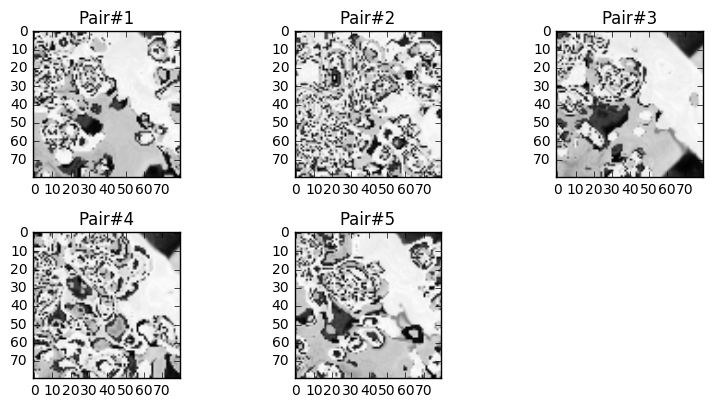

In [34]:
plt.figure(5, figsize=(8,6))
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    Iwarpped = coarse_to_fine(img1, I, is_lk=True, lk_itr=1, lk_n=3, lk_m=3)
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(Iwarpped)
plt.tight_layout()

# Computer Exercise 14

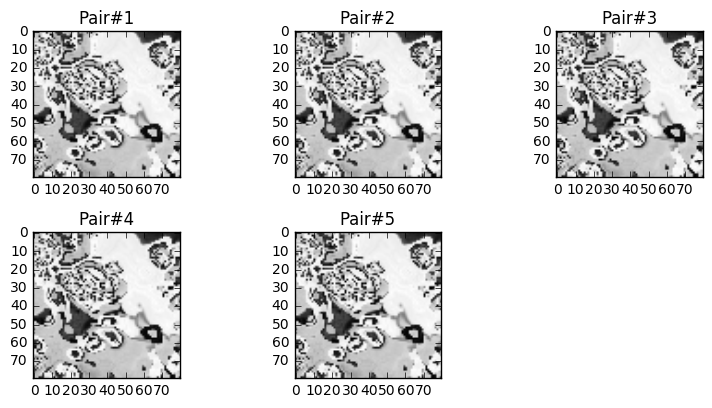

In [35]:
ITR = 3
plt.figure(5, figsize=(8, 6))
I1b = cv2.copyMakeBorder(img1, 1, 1, 1, 1, cv2.BORDER_REFLECT)
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    I2 = cv2.copyMakeBorder(I, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    I1 = I1b
    n , m = np.array(I1.shape)
    y_cent , x_cent = (0.5 * np.array(I1.shape)).astype(np.int)
    U = np.zeros_like(img1)
    V = np.zeros_like(img1)
    for itr in xrange(ITR):
        I1 = cv2.copyMakeBorder(img1, 1, 1, 1, 1, cv2.BORDER_REFLECT)
        M, b, N = lk_M_mat(I1, I2, x_cent, y_cent, glob_mod=True, K=25, sigma=2)
        try:            
            tetha = scipy.linalg.solve(M, b)
            du, dv = lk_local_vel(I1, I2, x_cent, y_cent, tetha, N)
            du = median_filter(du, K)
            dv = median_filter(dv, K)
            U = U + du[1:-1, 1:-1]
            V = V + dv[1:-1, 1:-1]
        except:
            pass
        yy, xx = np.mgrid[0:I.shape[0], 0:I.shape[0]]
        Iorg = cv2.remap(I, (xx-U).astype(np.float32), (yy-V).astype(np.float32), 
                         interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT)
        I1 = cv2.remap(I, (xx+U).astype(np.float32), (yy+V).astype(np.float32), 
                         interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REFLECT, dst=Iorg)
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(Iwarpped)
plt.tight_layout()

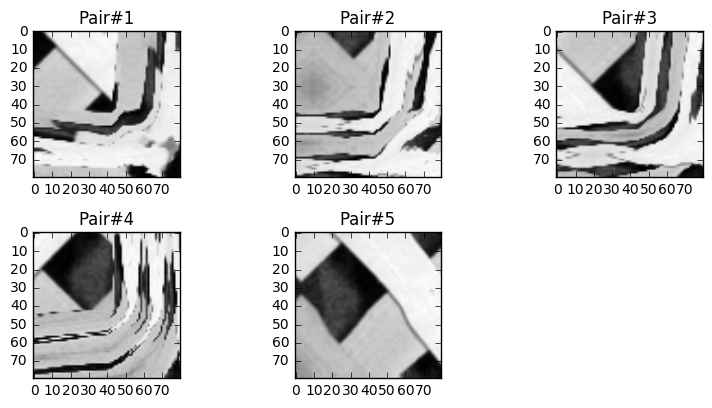

In [36]:
# Coarse to fine version.
plt.figure(5, figsize=(8,6))
for plt_idx, I in enumerate((img2, img3, img4, img5, img6)):
    Iwarpped = coarse_to_fine(img1, I, is_lk=True, lk_itr=1, lk_global=True)
    plt.subplot(3, 3, plt_idx + 1)
    plt.title("Pair#{}".format(plt_idx + 1))
    plt.imshow(Iwarpped)
plt.tight_layout()